# Volcanic SO<sub>2</sub> Emission Project

When volcanoes erupt, they emit a mixture of gases and particles into the air. Some of them, such as ash and sulphur dioxide, have a cooling effect, because they reflect sunlight away from the earth. Others, such as CO<sub>2</sub>, cause warming by adding to the the greenhouse effect.<br>
Magma contains a small amount of SO<sub>2</sub>, typically less than 10% by volume. Large eruptions thrust the SO<sub>2</sub>, into the upper atmosphere > 20 km (the stratosphere ) where it is transported around the planet. Contact with abundant water changes the SO<sub>2</sub>, gas into sulfuric acid (H<sub>2</sub>SO<sub>4</sub>) droplets called aerosols. Even though they are microscopic, there are billions of such aerosols following a big eruption, so that they actually affect the climate. Each aerosol absorbs some of the radiation from the sun, and thus heats itself and the surrounding stratosphere. But each ray of sunlight that hits an aerosol does not strike the Earth, robbing the surface of that small amount of heat. During the 1900s there were three large eruptions that caused the entire planet to cool down by as much as 1°C. Volcanic coolings persist for only 2 to 3 years because the aerosols ultimately fall out of the stratosphere and enter the lower atmosphere where rain and wind quickly disperse them.<br>

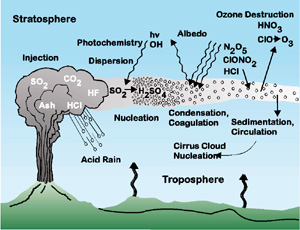

In [28]:
from IPython.display import Image
Image("gas.jpg", width = 400)

The annual amount of volcanic SO<sub>2</sub> emitted is both poorly constrained and highly variable. The uncertainty in released SO<sub>2</sub> arises from the stochastic nature of volcanic processes, very little or no surface monitoring of many volcanoes, and from uncertainties in the contribution of volcanic sulfur emitted by quiescent degassing. The effects of SO<sub>2</sub> in the atmosphere depend not only on the amount released, but also on the altitude of the plume. Altitude information is important for at mospheric chemistry, as SO<sub>2</sub> reactions and depletion times change with height and atmospheric composition, particularly as a function of water vapour concentration.

All data about volcanoes comes from Smithsonian Institution Natural Museum of Natural History Global Volcanism Program
https://volcano.si.edu/

All historical climate data from the Climate Change Knowledge Portal by the World Bank Group
https://climateknowledgeportal.worldbank.org/
 
Image from https://pubs.usgs.gov/of/1997/of97-262/of97-262.html#:~:text=Some%20gases%2C%20such%20as%20carbon,volcanic%20smog%20or%20%22vog%22.

In this project I want to study the short-term volcanic cooling effect due to SO<sub>2</sub> emission by Etna volcano on temperature and rainfall in Italy.

In [30]:
# Importing the libraries
import warnings
warnings.simplefilter(action ='ignore', category = FutureWarning)

import pandas as pd
import numpy as np
import re
#import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

### The World Database of Holocene volcanoes, volcanoes location and eruption dates from the past 10,000 years

In [31]:
# Importing the Volcanoes dataset 
data = pd.read_excel('./GVP_Volcano_List_Holocene.xls', skiprows = 1)


In [32]:
# Cleaning up the Data 
data['Primary Volcano Type'] = data['Primary Volcano Type'].str.replace('\(\w*\)','') 
data.drop(data[data['Last Known Eruption'] == 'Unknown'].index, inplace = True) 
data['Volcano Name'] = data['Volcano Name'].str.replace('\(\w*\)','')

# Separating Eruption Year to BCE-Before Common Era (or BC) and CE-Common Era (or AD) 
data[['LastYearEruption', 'Era']] = data['Last Known Eruption'].str.split(n = 1, expand = True)

# Deleting volcanos if last eruption was in BCE Era 
data = data.replace(to_replace ='None', value = np.nan).dropna()
data.drop(data[data['Era'] == 'BCE'].index, inplace = True)
data['LastYearEruption'] = data['LastYearEruption'].apply(pd.to_numeric)  
data.drop(data[data['LastYearEruption'] <= 1979].index, inplace = True)         
#data.head()


### Map of all active volcanoes in years of 1979-2016
##### The reason for choosing this specific period of time is related to availablity of SO<sub>2</sub> emission data.

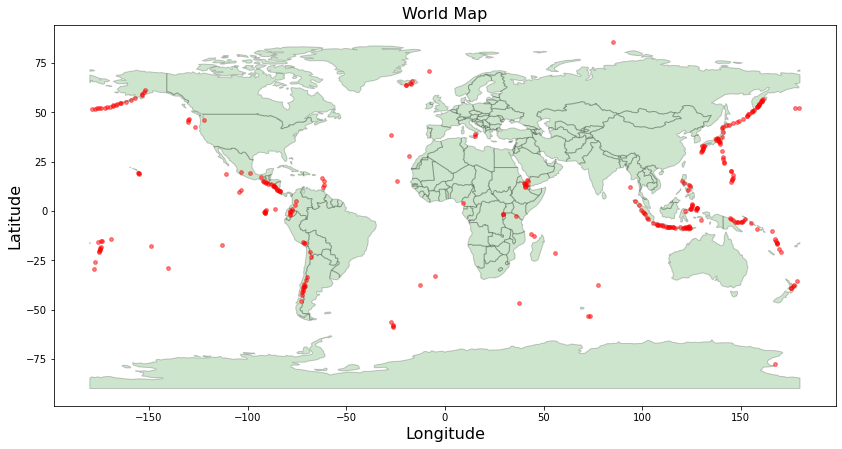

There are 281 active volcanoes around the world during the years of 1979 - 2016.


In [33]:
# Plotting Data using Geopandas 
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
wmap = GeoDataFrame(data, geometry = geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
wmap.plot(ax = world.plot(figsize = (14, 10), facecolor = 'green', alpha = 0.2, edgecolor = 'black'), marker ='o', color ='red', alpha = 0.5, markersize = 14)

plt.xlabel('Longitude', fontsize = 16) 
plt.ylabel('Latitude',fontsize = 16)
plt.title('World Map', fontsize = 16)
plt.show()

print(f'There are {data.shape[0]} active volcanoes around the world during the years of 1979 - 2016.' )


### Classification of Volacanos

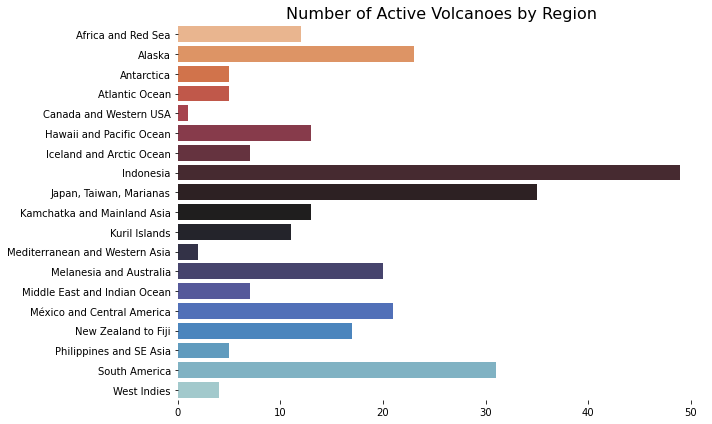

In [34]:
# Plotting Data using Seaborn plotting functions
volcanosByRegion = data.groupby('Region')['Volcano Name'].count()

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y = 'Region', x = 'Volcano Name', data = volcanosByRegion.reset_index(), palette = 'icefire_r')
ax.set_xlabel('', fontsize = 14)
ax.set_ylabel('', fontsize = 14)
ax.set_title('Number of Active Volcanoes by Region', fontsize = 16)
for spine in plt.gca().spines.values():
    spine.set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

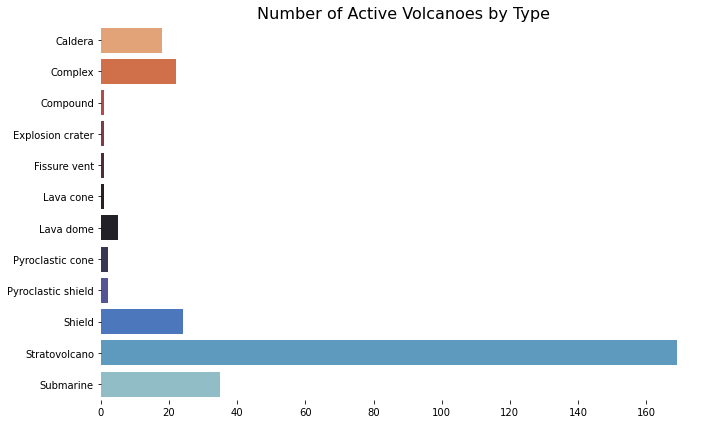

In [35]:
volcanosByType = data.groupby('Primary Volcano Type')['Volcano Name'].count()

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y = 'Primary Volcano Type', x = 'Volcano Name', data = volcanosByType.reset_index(), palette = 'icefire_r')
ax.set_xlabel('', fontsize = 14)
ax.set_ylabel('', fontsize = 14)
ax.set_title('Number of Active Volcanoes by Type', fontsize = 16)
for spine in plt.gca().spines.values():
    spine.set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()


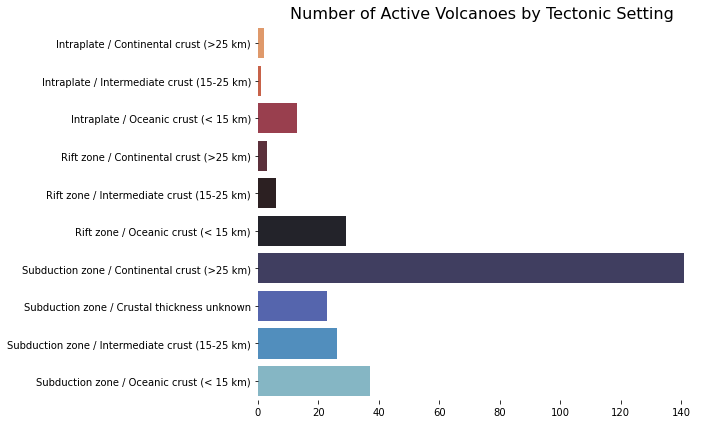

In [36]:
# Plotting Data using Seaborn plotting functions
volcanosByTS = data.groupby('Tectonic Setting')['Volcano Name'].count()

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y = 'Tectonic Setting', x = 'Volcano Name', data = volcanosByTS.reset_index(), palette = 'icefire_r')
ax.set_xlabel('', fontsize = 14)
ax.set_ylabel('', fontsize = 14)
ax.set_title('Number of Active Volcanoes by Tectonic Setting', fontsize = 16)
for spine in plt.gca().spines.values():
    spine.set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

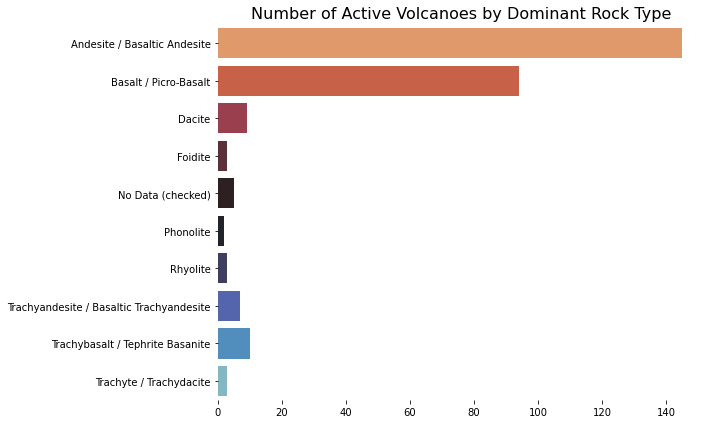

In [37]:
# Plotting Data using Seaborn plotting functions
volcanosByRT = data.groupby('Dominant Rock Type')['Volcano Name'].count()

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(y = 'Dominant Rock Type', x = 'Volcano Name', data = volcanosByRT.reset_index(), palette = 'icefire_r')
ax.set_xlabel('', fontsize = 14)
ax.set_ylabel('', fontsize = 14)
ax.set_title('Number of Active Volcanoes by Dominant Rock Type', fontsize = 16)

for spine in plt.gca().spines.values():
    spine.set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

### This project is looking at the volcano Etna located in Italy, Mediterranean and Western Asia Region with following characteristics
***Primary Volcano Type:*** Stratovolcano<br>
***Latitude:*** 37.748<br>
***Longitude:*** 14.999 <br>
***Elevation (m):*** 3320 <br>
***Dominant Rock Type:*** Trachybasalt / Tephrite Basanite <br>
***Tectonic Setting:*** Subduction zone / Continental crust (>25 km) <br>
***LastYearEruption:*** Jan - March 2021 and continuing now <br>

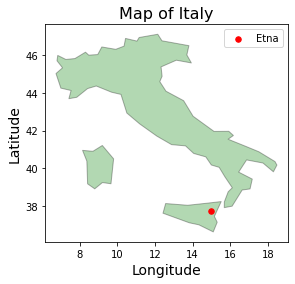

In [38]:
# Plotting Data using Geopandas 
Etna = data[data['Volcano Name'] == 'Etna']
geo = data.geometry
EtnaLocation = GeoDataFrame(Etna, geometry = geo)
EtnaLocation.plot(ax = world[(world.name == "Italy")].plot(facecolor = 'green', alpha = 0.3, edgecolor = 'black'), marker ='o', color ='red', markersize = 30, label ='Etna')
plt.xlabel('Longitude', fontsize = 14) 
plt.ylabel('Latitude', fontsize = 14)
plt.title('Map of Italy', fontsize = 16)
plt.legend()
plt.show()

### Satellite-Based Measurements of Gases in Volcanic Plumes to Obtain Emission (SO<sub>2</sub>) Data for years 1979-2016

In [39]:
## Importing the Volcanoes Emission SO2 Data 1979-2016 dataset 
emission = pd.read_excel('./GVP_Emission_Results_ed.xls', skiprows = 1)

emission = emission.rename(columns = {'SO2 Altitude Range Start':'SO2 Altitude, km', 'Total SO2 Mass (kt)': 'SO2 Mass, kt'})
emission['Volcano Name'] = emission['Volcano Name'].str.replace('\(\w*\)','') 
emission.drop(['Emission ID', 'Method'], axis = 1, inplace = True)

# Separating Emission Period to Year, Month and Day
emission['Year'] = emission['Start Date'].dt.year
emission['Month'] = emission['Start Date'].dt.month
emission['Day'] = emission['Start Date'].dt.day
emission['Start Date'] = emission['Start Date'].dt.date
emission['End Date'] = emission['End Date'].dt.date

In [40]:
# Merging Volacnoes List and Emission Data for years 2006-2016

volcanoEmission = pd.merge(data, emission, how = 'right', on = ['Volcano Number', 'Volcano Name', 'Country'])
emissionEtna = emission[emission['Volcano Name'] =='Etna'].sort_values(['Start Date'], ascending=True)

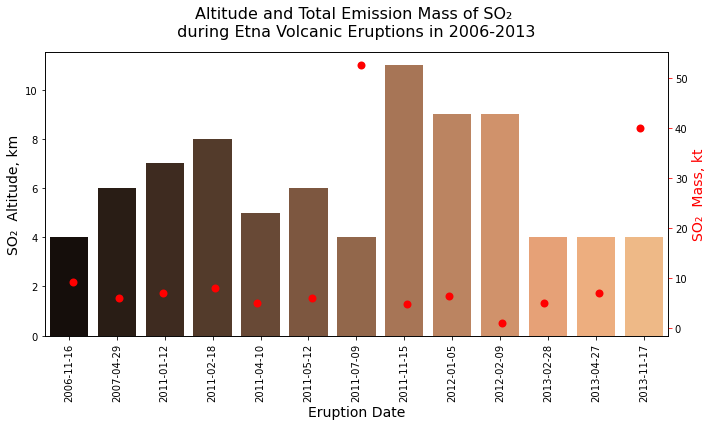

In [41]:
# Plotting Data using Seaborn plotting functions

fig, ax1 = plt.subplots(figsize = (10,6))
ax2 = ax1.twinx()
chart1 = sns.barplot(x = 'Start Date', y = 'SO2 Altitude, km', data = emissionEtna, palette = 'copper', dodge=False, ax = ax1)
chart2 = sns.stripplot(x = 'Start Date', y = 'SO2 Mass, kt', data = emissionEtna, color = 'red', size = 8)
plt.suptitle('Altitude and Total Emission Mass of SO\u2082 \n during Etna Volcanic Eruptions in 2006-2013 ', fontsize = 16)
plt.setp(chart1.get_xticklabels(), rotation = 90, horizontalalignment ='center')    
ax2.tick_params(axis ='y', color ='red')
ax1.set_xlabel('Eruption Date', fontsize = 14)
ax1.set_ylabel('SO\u2082  Altitude, km', fontsize = 14)
ax2.set_ylabel('SO\u2082  Mass, kt', fontsize = 14, color = 'red')
fig.tight_layout()
plt.show()

In [42]:
emissionByYear = emissionEtna.groupby('Year')['SO2 Mass, kt'].sum().to_frame(name = 'SO2 Mass Mean, kt').reset_index()
altByYear = emissionEtna.groupby('Year')['SO2 Altitude, km'].max().to_frame(name = 'SO2 Altitude Mean, km').reset_index()
eruptionData = pd.merge(emissionByYear, altByYear, how = 'left', on = [ 'Year'])


### World Temperature and Rainfall Historical Data during years 1991-2016

In [43]:
# Importing the World Temperature Historical Data (1991-2016)

temp = pd.read_csv('./WorldTempHistorical.csv')
temp = temp.rename(columns = {'Temperature - (Celsius)':'AvgTemp, C', 'Statistics': 'Month'})
temp.drop(['Abbr'], axis = 1, inplace = True)
temp['Month'] = temp['Month'].map(lambda x: str(x)[:-8])
temp.drop(temp[temp['Year'] <= 1991].index, inplace = True) 

In [44]:
# Importing the World Rainfall Historical Data (1991-2016)

rainfall = pd.read_csv('./WorldRainfallHistorical.csv')
rainfall = rainfall.rename(columns = {'Rainfall - (MM)':'Rainfall, mm', 'Statistics': 'Month'})
rainfall.drop(['Abbr'], axis = 1, inplace = True)
rainfall['Month'] = rainfall['Month'].map(lambda x: str(x)[:-8])

In [45]:
# Merging the Temperature and Rainfall Data during the years (1991-2016)

TempRainfall = pd.merge(temp,rainfall, how ="inner", on = ['Country', 'Year', 'Month'])
TempRainfall['Country'] = TempRainfall['Country'].str.replace('\s','') 

### Getting Data for Model
According to the Global Volcanism Program data since January 1991 Etna's eruptive activity has been characterized by 13 episodic events during years 2006 - 2103.<br> For the modeling purposes temperature, rainfall, SO<sub>2</sub> mass and SO<sub>2</sub> altitude data combined in one DataFrame. Since volcanic coolings persist for only 2 to 3 years, the modeling data include extended period of time from 2003 to 2016, which is 3 years before and 3 years after the Etna eruptions.

In [46]:
weatherItaly = TempRainfall[(TempRainfall['Country'] =='Italy') & (TempRainfall['Year'] >= 2003)]
rainByYear = weatherItaly.groupby('Year')['Rainfall, mm'].sum().to_frame(name = 'Rainfall Total, mm').reset_index().round(1)
weatherByYear = weatherItaly.groupby('Year')['AvgTemp, C'].mean().to_frame(name = 'Avg Temp, C').reset_index().round(2)
modelData = pd.merge(rainByYear,weatherByYear, how = 'left', on = ['Year'])
modelData = pd.merge(modelData,eruptionData, how = 'left', on = ['Year'])
modelData.update(modelData[['SO2 Mass Mean, kt', 'SO2 Altitude Mean, km']].fillna(0))


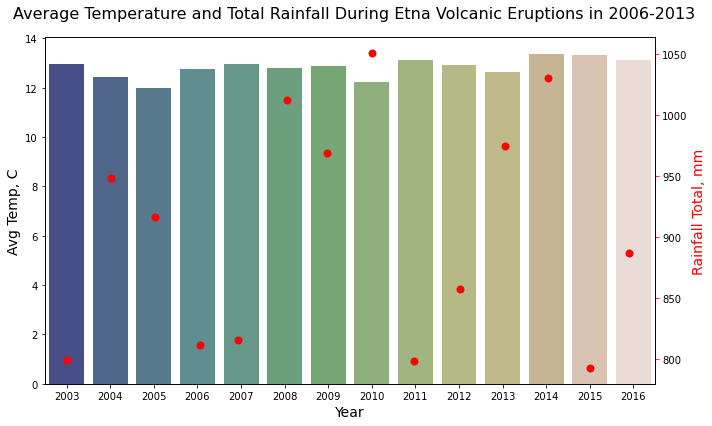

In [47]:
# Plotting Data using Seaborn plotting functions

fig, ax1 = plt.subplots(figsize = (10,6))
ax2 = ax1.twinx()
chart1 = sns.barplot(x = 'Year', y = 'Avg Temp, C', data = modelData, palette = 'gist_earth', alpha = 0.8, ax = ax1)
chart2 = sns.stripplot(x = 'Year', y = 'Rainfall Total, mm', data = modelData, color = 'red', size = 8)
plt.suptitle('Average Temperature and Total Rainfall During Etna Volcanic Eruptions in 2006-2013 ', fontsize = 16) 
ax2.tick_params(axis ='y', color ='red')
ax1.set_xlabel('Year', fontsize = 14)
ax1.set_ylabel('Avg Temp, C', fontsize = 14)
ax2.set_ylabel('Rainfall Total, mm', fontsize = 14, color = 'red')
fig.tight_layout()
plt.show()

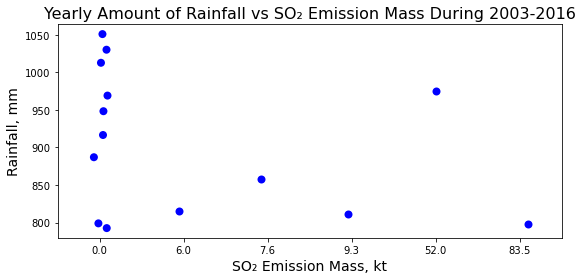

In [48]:
# Plotting Data using Seaborn plotting functions

fig, ax = plt.subplots(figsize = (8,4))
chart = sns.stripplot(x = 'SO2 Mass Mean, kt', y = 'Rainfall Total, mm', data = modelData, color = 'blue', size = 8)
ax.set_ylabel('Rainfall, mm', fontsize = 14)
ax.set_xlabel('SO\u2082 Emission Mass, kt', fontsize = 14)
ax.set_title('Yearly Amount of Rainfall vs SO\u2082 Emission Mass During 2003-2016', fontsize = 16)

fig.tight_layout()
plt.show()

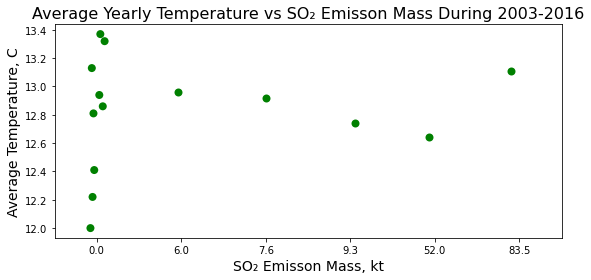

In [49]:
# Plotting Data using Seaborn plotting functions

fig, ax = plt.subplots(figsize = (8,4))
chart = sns.stripplot(x = 'SO2 Mass Mean, kt', y = 'Avg Temp, C', data = modelData, color = 'green', size = 8)
ax.set_ylabel('Average Temperature, C', fontsize = 14)
ax.set_xlabel('SO\u2082 Emisson Mass, kt', fontsize = 14)
ax.set_title('Average Yearly Temperature vs SO\u2082 Emisson Mass During 2003-2016', fontsize = 16)

fig.tight_layout()
plt.show()

### Linear Regression Model for the Dependence of the Amount of Rainfall and SO<sub>2</sub> Emission Mass

In [50]:
# Importing the libraries
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn import metrics

X = modelData[['SO2 Mass Mean, kt']]
y = modelData['Rainfall Total, mm']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [51]:
regressorRF = LinearRegression()
regressorRF.fit(X_train, y_train)

LinearRegression()

In [52]:
print('Linear model coeff (w): {}'.format(regressorRF.coef_))
print('Linear model intercept (b): {:.3f}'.format(regressorRF.intercept_))
print('R-squared score (training): {:.3f}'.format(regressorRF.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressorRF.score(X_test, y_test)))

Linear model coeff (w): [1.06868853]
Linear model intercept (b): 895.652
R-squared score (training): 0.035
R-squared score (test): -0.686


In [53]:
y_pred = regressorRF.predict(X_test)
RfModel = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(1)})
print(RfModel)

    Actual  Predicted
8    798.7      984.9
6    969.1      895.7
4    815.9      902.1
11  1030.2      895.7
2    916.6      895.7


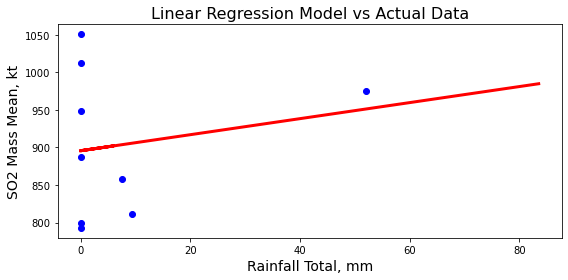

In [54]:
# Plot the Fitting Model
fig, ax = plt.subplots(figsize = (8, 4))
plt.scatter(X_train, y_train,  color ='blue')
plt.plot(X_test, y_pred, color ='red', linewidth = 3)
ax.set_xlabel('Rainfall Total, mm', fontsize = 14)
ax.set_ylabel('SO2 Mass Mean, kt', fontsize = 14)
plt.title('Linear Regression Model vs Actual Data', fontsize = 16)
fig.tight_layout()
plt.show()

### Evaluating the Model

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2))

Mean Absolute Error: 100.26
Mean Squared Error: 13205.33
Root Mean Squared Error: 114.91


### Linear Regression Model for the Dependence of the Average Yearly Temperature and SO<sub>2</sub> Emission Mass

In [56]:
X = modelData[['SO2 Mass Mean, kt']]
y = modelData['Avg Temp, C']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [57]:
regressorT = LinearRegression()
regressorT.fit(X_train, y_train)

LinearRegression()

In [58]:
print('Linear model coeff (w): {}'.format(regressorT.coef_))
print('Linear model intercept (b): {:.3f}'.format(regressorT.intercept_))
print('R-squared score (training): {:.3f}'.format(regressorT.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressorT.score(X_test, y_test)))

Linear model coeff (w): [-0.00320155]
Linear model intercept (b): 12.817
R-squared score (training): 0.026
R-squared score (test): -0.227


In [59]:
y_pred = regressorT.predict(X_test)
TModel = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2)})
print(TModel)

    Actual  Predicted
8    13.11      12.55
6    12.86      12.82
4    12.96      12.80
11   13.37      12.82
2    12.00      12.82


### Evaluating the Model

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2))

Mean Absolute Error: 0.43
Mean Squared Error: 0.26
Root Mean Squared Error: 0.51


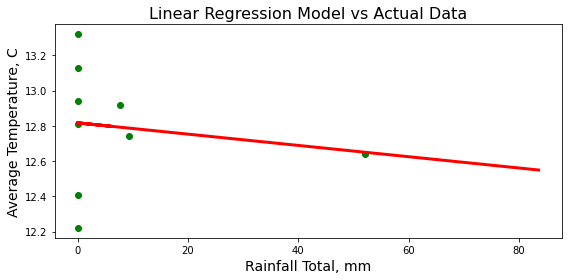

In [61]:
# Plot the Fitting Model
fig, ax = plt.subplots(figsize =(8, 4))
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_test, y_pred, color ='red', linewidth = 3)
ax.set_xlabel('Rainfall Total, mm', fontsize = 14)
ax.set_ylabel('Average Temperature, C', fontsize = 14)
plt.title('Linear Regression Model vs Actual Data', fontsize = 16)
fig.tight_layout()
plt.show()

### Conclusion


Negative value for R<sup>2</sup> for both Temperature and Rainfall test models means that the chosen models doesn't fits the data well.
There are many factors that may have contributed to inaccuracy of the Linerar Regression Model, such as need more data and bad assumptions: <br>

- Only one volcano Etna was used to analyze the impact of volcanic gases on weather in Italy.
- The Historic Tempearture and Rainfall data was limited to only years 1991 thru 2016, whereas having data for extended years worth could have helped to improve the accuracy quite a bit.
- The Volcanic SO<sub>2</sub> data was also limited from 1979 to 2016 years and only include SO<sub>2</sub> emissions data from the eruptive volcano activity but exclide the quiescent/passive SO<sub>2</sub> degassing during lower intensity volcanic activity. 
- Those models don't consider the human effect on the climat due to increasing of CO<sub>2</sub> in the atmosphere related to exponential increases in human population, massive land cover changes and the burning of fossil fuels.

Dispite the not accurate assuptions and missing data, the models could predict the short-term volcanic cooling effect due to SO<sub>2</sub> emission on Temperature and Rainfall.

